## Quiz 2 
#### Valeria Acuña
#### 26915574

In [ ]:
import pandas as pd
import seaborn
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('historical_data.csv')
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [5]:
# Exploración inicial
print(df.head())
print(df.info())
print(df.describe())

   market_id           created_at actual_delivery_time  store_id  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1       

In [6]:
print(df.dtypes)

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object


In [7]:
# Identificar la variable que contiene la información de ventas
print(df.columns)

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')


###  Pregunta 1: ¿Cúal es el ‘store_id‘ con la mayor cantidad de dinero en ventas?

In [8]:
# Análisis para encontrar el 'store id' con mayores ventas
sales_by_store = df.groupby('store_id')['subtotal'].sum().reset_index()
sales_by_store = sales_by_store.sort_values('subtotal', ascending=False)
print(f"El 'store id' con la mayor cantidad de dinero en ventas es: {sales_by_store.iloc[0]['store_id']}")

# Calcular el total de ventas
total_sales = df['subtotal'].sum()
print(f"El total de ventas es: {total_sales:.2f}")

El 'store id' con la mayor cantidad de dinero en ventas es: 6074
El total de ventas es: 529567324.00


### Pregunta 2: ¿Cuantas tiendas diferentes venden pizza?

In [9]:
# Contar el número de tiendas que venden pizza usando groupby
num_pizza_stores = df.groupby('store_primary_category').size().loc['pizza']
print(f"Hay {num_pizza_stores} tiendas diferentes que venden pizza.")

Hay 17321 tiendas diferentes que venden pizza.


### Pregunta 3: ¿Puede afirmarse que más elementos distintos en la compra esta asociado con la variable estimated store to consumer driving duration?

In [10]:
# Verificar valores faltantes en las columnas
print(df.isnull().sum())
# Verificar los tipos de datos de las columnas
print(df.dtypes)

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64
market_id                                       float64
created_at                                       object
actual_deli

In [11]:
# Eliminar filas con valores faltantes
df = df.dropna(subset=['estimated_store_to_consumer_driving_duration'])

# Imputar valores faltantes con la media
df['estimated_store_to_consumer_driving_duration'] = df['estimated_store_to_consumer_driving_duration'].fillna(df['estimated_store_to_consumer_driving_duration'].mean())

C:\Users\PC\AppData\Local\Temp\ipykernel_11604\4260533709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['estimated_store_to_consumer_driving_duration'] = df['estimated_store_to_consumer_driving_duration'].fillna(df['estimated_store_to_consumer_driving_duration'].mean())


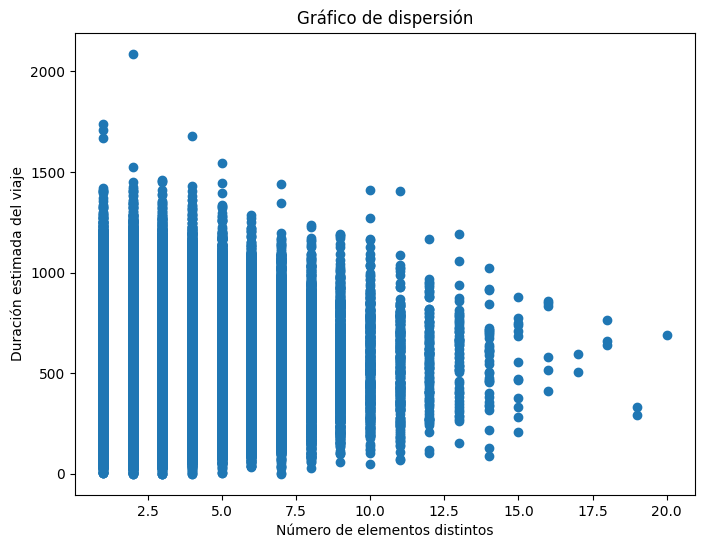

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['num_distinct_items'], df['estimated_store_to_consumer_driving_duration'])
plt.xlabel('Número de elementos distintos')
plt.ylabel('Duración estimada del viaje')
plt.title('Gráfico de dispersión')
plt.show()

In [13]:
print(df[['num_distinct_items', 'estimated_store_to_consumer_driving_duration']].describe())

       num_distinct_items  estimated_store_to_consumer_driving_duration
count       196902.000000                                 196902.000000
mean             2.671248                                    545.358935
std              1.630350                                    219.352902
min              1.000000                                      0.000000
25%              1.000000                                    382.000000
50%              2.000000                                    544.000000
75%              3.000000                                    702.000000
max             20.000000                                   2088.000000


In [14]:
import scipy.stats as stats

# Calcular el coeficiente de correlación de Pearson
corr, p_value = stats.pearsonr(df['num_distinct_items'], df['estimated_store_to_consumer_driving_duration'])

# Imprimir los resultados
print(f"Coeficiente de correlación: {corr:.2f}")
print(f"Valor p: {p_value:.4f}")

Coeficiente de correlación: 0.02
Valor p: 0.0000


### Pregunta 4: ¿Qué tipo de comida tarda menos en ser preparada (desde creación de orden hasta delivery)?

In [15]:
df = pd.read_csv('historical_data.csv')

# Convertir 'actual_delivery_time' y 'created_at' a tipo DateTime
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])

# Calcula el tiempo de preparación promedio para cada categoría de restaurante
actual_delivery_time_mean = df.groupby('store_primary_category')['actual_delivery_time'].mean()
created_at_mean = df.groupby('store_primary_category')['created_at'].mean()
avg_prep_time = (actual_delivery_time_mean - created_at_mean).dt.total_seconds()

# Ordena los resultados de menor a mayor tiempo de preparación
avg_prep_time = avg_prep_time.sort_values()

# Imprime los resultados
print(avg_prep_time)


store_primary_category
chocolate      2048.000000
catering       2357.205558
indonesian     2445.000000
kosher         2494.568627
gluten-free    2521.709677
                  ...     
belgian        3299.500000
brazilian      3358.377419
caribbean      3365.897233
spanish        3370.702703
italian        4212.053350
Length: 74, dtype: float64


###  Pregunta 5:   Usando la ubicación con menos ordenes, ¿Cúal es el mejor momento para ordenar entre [5pm, 10pm]? Responda que ubicación usó y la mejor hora para ordenar

In [16]:
market_id_counts = df['market_id'].value_counts()
min_market_id = market_id_counts.idxmin()
market_df = df[df['market_id'] == min_market_id]
market_df['created_at_hour'] = market_df['created_at'].dt.hour
best_hour = market_df[(market_df['created_at_hour'] >= 17) & (market_df['created_at_hour'] <= 22)]['created_at_hour'].value_counts().idxmax()

C:\Users\PC\AppData\Local\Temp\ipykernel_11604\473060747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_df['created_at_hour'] = market_df['created_at'].dt.hour


In [19]:
print(f"La ubicación con menos ordenes: {min_market_id}")
print(f"El mejor momento para ordenar entre [5pm, 10pm]: {best_hour}")

La ubicación con menos ordenes: 6.0
El mejor momento para ordenar entre [5pm, 10pm]: 20
